In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime, timezone, timedelta

In [2]:
#user input, multiple
lakes = ["01004600", "01004000", "01016900"]

In [3]:
lakes_data = pd.read_csv(f"Resources/fish_length_info/fish_lengths.csv",converters={"lake_ID": str})

In [4]:
lakes_df = lakes_data
lakes_df["survey_date"] = pd.to_datetime(lakes_df["survey_date"],format="%Y-%m-%d")
lakes_df["numeric_survey_date"] = pd.to_numeric(lakes_df["survey_date"])
lakes_df = lakes_df.sort_values("survey_date")
lakes_df = lakes_df.reset_index(drop=True)
lakes_df.head()

,lake_ID,species,fish_count,maximum_length,minimum_length,survey_ID,survey_date,numeric_survey_date
0,01007300,PMK,"[[4, 4], [5, 2], [6, 4], [7, 1]]",7,4,113360,1993-06-28,741225600000000000
1,01007300,BLG,"[[0, 1], [1, 4], [2, 3], [3, 49], [4, 247], [5...",8,1,113360,1993-06-28,741225600000000000
2,01007300,HSF,"[[6, 1], [7, 1]]",7,6,113360,1993-06-28,741225600000000000
3,01007300,LMB,"[[1, 16], [2, 1], [9, 1]]",9,1,113360,1993-06-28,741225600000000000
4,01007300,BLC,"[[10, 3], [3, 1], [4, 21], [5, 17], [6, 1], [7...",10,3,113360,1993-06-28,741225600000000000


In [36]:
fish_averages = []
for row in lakes_df["fish_count"]:
    sample = row.replace("]","").replace("[","").replace(" ","").split(",")
    #breakdown string into list of lengths found
    mean_numbers = []
    for n in range(len(sample)):
        if n % 2 == 1:
            fishlength = int(sample[n-1])
            fishcount = int(sample[n])
            for c in range(fishcount):
                mean_numbers.append(fishlength)
    fish_averages.append(np.mean(mean_numbers))
lakes_df["average_length"] = pd.Series(fish_averages)
lakes_df.head()

,lake_ID,species,fish_count,maximum_length,minimum_length,survey_ID,survey_date,numeric_survey_date,average_length
0,01007300,PMK,"[[4, 4], [5, 2], [6, 4], [7, 1]]",7,4,113360,1993-06-28,741225600000000000,5.181818
1,01007300,BLG,"[[0, 1], [1, 4], [2, 3], [3, 49], [4, 247], [5...",8,1,113360,1993-06-28,741225600000000000,4.662651
2,01007300,HSF,"[[6, 1], [7, 1]]",7,6,113360,1993-06-28,741225600000000000,6.500000
3,01007300,LMB,"[[1, 16], [2, 1], [9, 1]]",9,1,113360,1993-06-28,741225600000000000,1.500000
4,01007300,BLC,"[[10, 3], [3, 1], [4, 21], [5, 17], [6, 1], [7...",10,3,113360,1993-06-28,741225600000000000,5.631579


In [6]:
#user input, singular
species = "BLG"

In [7]:
#user input, singular
start_date = np.datetime64('1900-01-31')

In [8]:
#prep data for histogram
fish_lengths = {}
for lakeid in lakes:
    #sort by lake and species
    species_length = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["survey_date"] >= start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "fish_count"]
    fish_lengths[lakeid] = []
    #scrub each row string and convert to list of lengths collected
    for length in species_length:
        #clean up string of list syntax
        sample = length.replace("]","").replace("[","").replace(" ","").split(",")
        #breakdown string into list of lengths found
        for n in range(len(sample)):
            if n % 2 == 1:
                fishlength = int(sample[n-1])
                fishcount = int(sample[n])
                for c in range(fishcount):
                    fish_lengths[lakeid].append(fishlength)

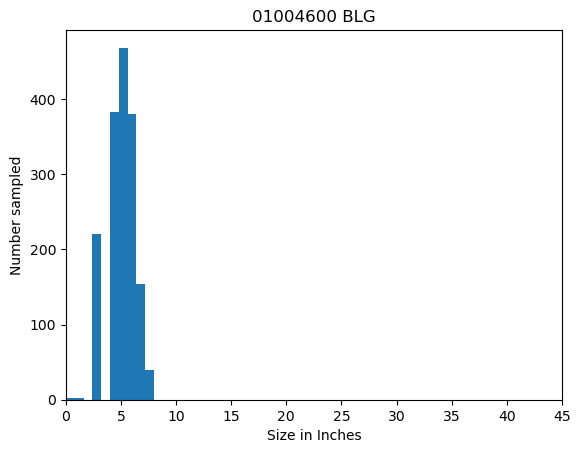

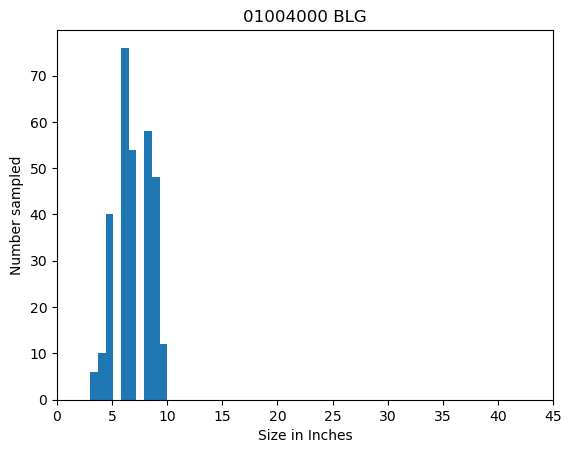

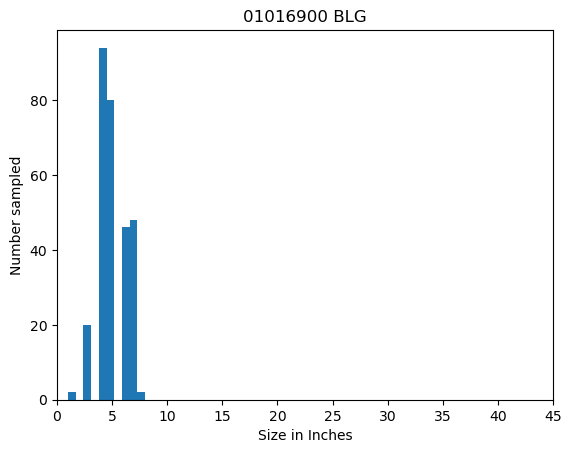

In [20]:
for lakeid in fish_lengths.keys():
    if bool(fish_lengths[lakeid]) == False:
        print(f"{lakeid} did not return results for the timeframe or species specified.")
    else:
        plt.hist(fish_lengths[lakeid])
        plt.xlabel("Size in Inches")
        plt.ylabel("Number sampled")
        plt.xlim(0,45)
        plt.title(f"{lakeid} {species}")
        plt.show()

In [37]:
#all dates after start date
lake_scatter_length_list = []
lake_scatter_survey_date_list = []
lake_scatter_numeric_survey_date_list = []
for lakeid in lakes:
    species_length = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["survey_date"] >= start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "average_length"]
    species_survey_date = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["survey_date"] >= start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "survey_date"]
    lake_scatter_numeric_survey_date = (lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["survey_date"] >= start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "numeric_survey_date"])
    lake_scatter_length_list.append(species_length)
    lake_scatter_survey_date_list.append(species_survey_date)
    lake_scatter_numeric_survey_date_list.append(lake_scatter_numeric_survey_date)

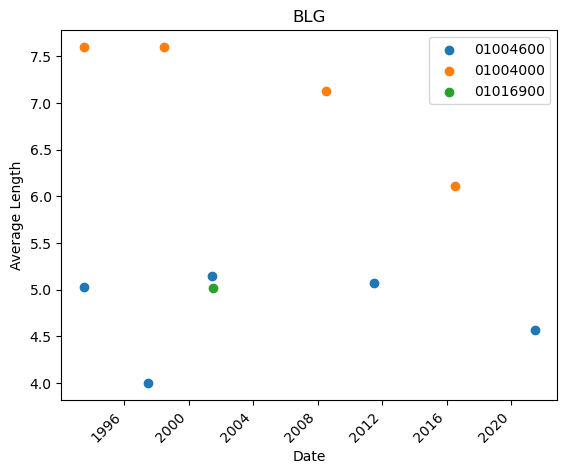

In [38]:
for _ in range(len(lakes)):
    plt.scatter(lake_scatter_survey_date_list[_],lake_scatter_length_list[_], label=lakes[_])
plt.title(species)
plt.ylabel("Average Length")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.show()

#### Plot length and regression for each lake.

Notes:
Only 1 data point exists for 01016900


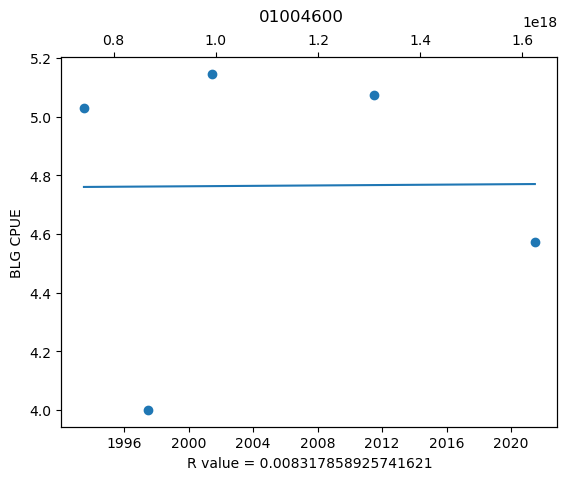

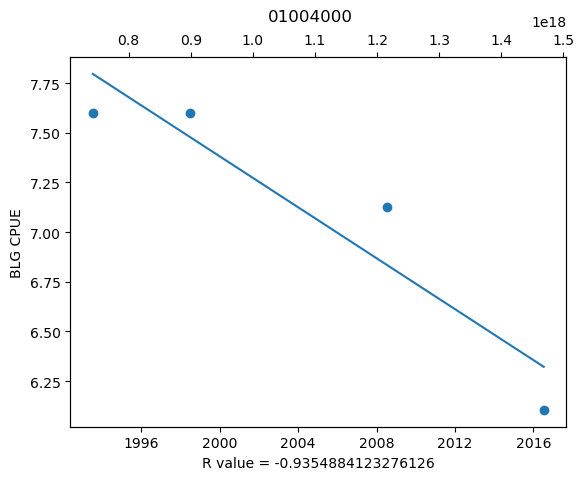

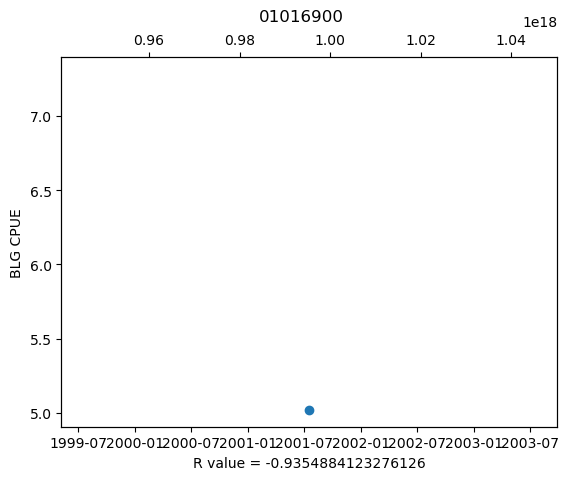

In [39]:
print("Notes:")
for lake in range(len(lakes)):
    if len(lake_scatter_numeric_survey_date_list[lake]) == 0:
        print(f"Survey Data Empty for {lakes[lake]}")
    elif len(lake_scatter_numeric_survey_date_list[lake]) == 1:
        print(f"Only 1 data point exists for {lakes[lake]}")
    else:
        regression_values = linregress(lake_scatter_numeric_survey_date_list[lake],lake_scatter_length_list[lake])
    fig, ax1 = plt.subplots(1,1)
    fig.suptitle(lakes[lake])
    ax1.scatter(lake_scatter_survey_date_list[lake],lake_scatter_length_list[lake], label=lakes[lake])
    ax1.set_ylabel(f"{species} CPUE")
    ax1.set_xlabel(f"R value = {regression_values.rvalue}")
    ax2 = ax1.twiny()
    ax2.plot(lake_scatter_numeric_survey_date_list[lake],(regression_values.slope*lake_scatter_numeric_survey_date_list[lake] + regression_values.intercept))

plt.show()